In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Considering the possible effects connected to LC50. We need to filter on **Mortality Group**

## Preprocessing on base_db

In [19]:
base_db = pd.read_csv('base_db_smiles.csv')

In [20]:
base_db.columns

Index(['Unnamed: 0', 'test_cas', 'exposure_type', 'obs_duration_mean',
       'conc1_type', 'conc1_mean', 'class', 'tax_order', 'family', 'genus',
       'species', 'organism_lifestage', 'organism_characteristics',
       'ecotox_group', 'smiles', 'atom_number', 'bonds_number', 'ring_numer',
       'Mol', 'MorganDensity', 'LogP'],
      dtype='object')

In [21]:
use_db = base_db.copy()
use_db = use_db[['test_cas', 'exposure_type', 'obs_duration_mean', 'conc1_type',
       'conc1_mean', 'class', 'tax_order', 'family', 'genus', 'species','atom_number', 'bonds_number', 'ring_numer',
       'Mol', 'MorganDensity', 'LogP']]

In [22]:
use_db.describe()

,obs_duration_mean,conc1_mean,atom_number,bonds_number,ring_numer,Mol,MorganDensity,LogP
count,53180.000000,5.318000e+04,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000
mean,62.448187,3.457718e+02,13.589921,13.224878,1.097499,244.474903,1.071260,1.278474
std,41.799142,6.721350e+03,9.188111,10.412063,1.358434,132.967880,0.323409,3.678951
min,0.125000,5.200000e-08,1.000000,0.000000,0.000000,9.012000,0.200000,-24.338100
25%,24.000000,1.790000e-01,6.000000,4.000000,0.000000,159.609000,0.842105,-0.784780
50%,48.000000,2.200000e+00,13.000000,13.000000,1.000000,228.679000,1.111111,2.121800
75%,96.000000,2.230000e+01,19.000000,19.000000,2.000000,326.437000,1.272727,3.689800
max,964.000000,9.860000e+05,123.000000,135.000000,14.000000,1736.185000,2.000000,13.789100


### obs_duration_mean/conc1_mean

In [23]:
# logarithmic transformations
use_db.obs_duration_mean = use_db.obs_duration_mean.apply(lambda x: np.log1p(x))
#use_db.conc1_mean = use_db.conc1_mean.apply(lambda x: np.log1p(x)) #Not good result

In [24]:
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["obs_duration_mean"]])
use_db[["obs_duration_mean"]] = minmax.transform(use_db[["obs_duration_mean"]])

In [25]:
use_db.describe()

,obs_duration_mean,conc1_mean,atom_number,bonds_number,ring_numer,Mol,MorganDensity,LogP
count,53180.000000,5.318000e+04,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000
mean,0.555602,3.457718e+02,13.589921,13.224878,1.097499,244.474903,1.071260,1.278474
std,0.130311,6.721350e+03,9.188111,10.412063,1.358434,132.967880,0.323409,3.678951
min,0.000000,5.200000e-08,1.000000,0.000000,0.000000,9.012000,0.200000,-24.338100
25%,0.459126,1.790000e-01,6.000000,4.000000,0.000000,159.609000,0.842105,-0.784780
50%,0.558757,2.200000e+00,13.000000,13.000000,1.000000,228.679000,1.111111,2.121800
75%,0.659861,2.230000e+01,19.000000,19.000000,2.000000,326.437000,1.272727,3.689800
max,1.000000,9.860000e+05,123.000000,135.000000,14.000000,1736.185000,2.000000,13.789100


In [26]:
# standardization
scaler = StandardScaler()
scaler.fit(use_db[["obs_duration_mean"]])
use_db[["obs_duration_mean"]] = scaler.transform(use_db[["obs_duration_mean"]])

## Atom Number

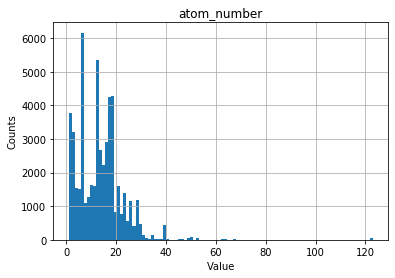

In [27]:
# plotted as before
use_db.atom_number.hist(bins=100)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [28]:
# logarithmic transformations
use_db.atom_number = use_db.atom_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["atom_number"]])
use_db[["atom_number"]] = minmax.transform(use_db[["atom_number"]])

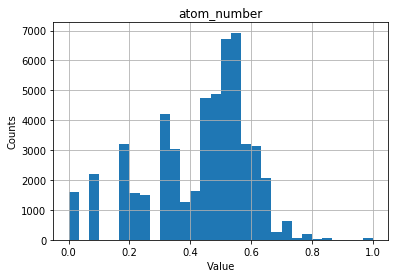

In [29]:
# plotted as before
use_db.atom_number.hist(bins=30)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## Bonds Number

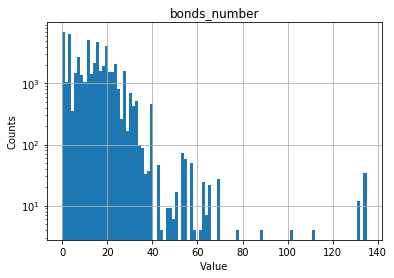

In [30]:
# plotted as before
use_db.bonds_number.hist(bins=100)
plt.yscale("log")
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [31]:
# logarithmic transformations
use_db.bonds_number = use_db.bonds_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["bonds_number"]])
use_db[["bonds_number"]] = minmax.transform(use_db[["bonds_number"]])

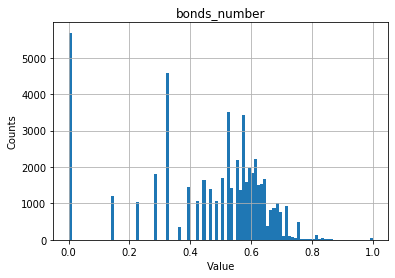

In [32]:
use_db.bonds_number.hist(bins=100)
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## Rings number

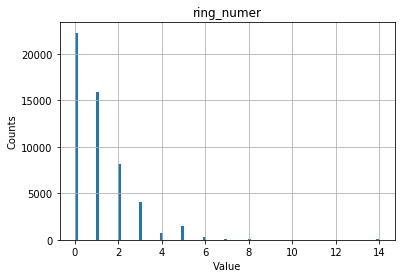

In [33]:
# plotted as before
use_db.ring_numer.hist(bins=100)
#plt.yscale("log")
plt.title("ring_numer")
plt.xlabel("Value")
plt.ylabel("Counts");

We assume this as a categrical features and we don't change it

## Mol

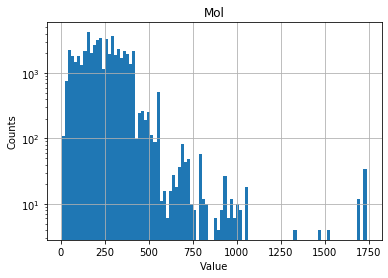

In [17]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.yscale("log")
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

We only this to scale the range of this variable

In [37]:
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["Mol"]])
use_db[["Mol"]] = minmax.transform(use_db[["Mol"]])

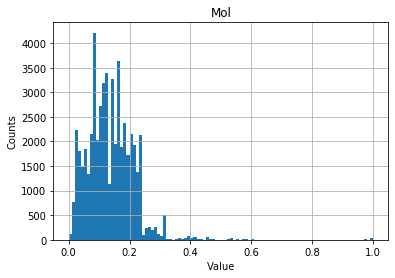

In [38]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

## Morgan Density

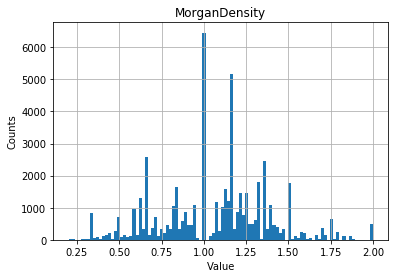

In [40]:
# plotted as before
use_db.MorganDensity.hist(bins=100)
#plt.yscale("log")
plt.title("MorganDensity")
plt.xlabel("Value")
plt.ylabel("Counts");

We keeo this untouch

## LogP

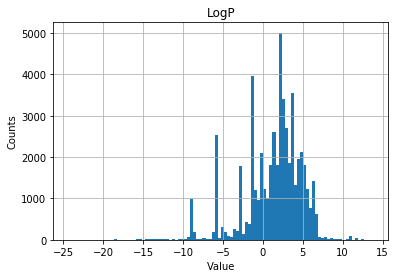

In [42]:
# plotted as before
use_db.LogP.hist(bins=100)
plt.title("LogP")
plt.xlabel("Value")
plt.ylabel("Counts");

### categorical features  
We will need to encode exposure_type, conc1_type, class, tax_order, family_genus, species. Not done now because we will encoding depending on the case

### Simple classification with Smile Features
Considering a threshold of 1mg/L of mortality

In [43]:
X = use_db.copy()
X = X[[
 'exposure_type',
 'obs_duration_mean',
 'conc1_type',
 'species',
 'atom_number',
 'bonds_number',
  'ring_numer',
  'Mol', 
  'MorganDensity', 'LogP']]

In [44]:
X['exposure_type'].unique()

array(['S', 'F', 'R', 'AQUA', 'P', 'IP', 'E', 'SP', 'O', 'FD'],
      dtype=object)

In [45]:
X['conc1_type'].unique()

array(['T', 'D', 'L', 'F', 'A', 'U'], dtype=object)

In [46]:
len(X['species'].unique())

488

For this  vaiables we decided to transform than by an OrdinalEncoder, in order to have all numnerical variables

In [47]:
enc = OrdinalEncoder(dtype=int)
enc.fit(X[["exposure_type", "conc1_type","species"]])
X[["exposure_type", "conc1_type","species"]] = enc.transform(X[["exposure_type", "conc1_type","species"]]) + 1

In [49]:
X.head()

,exposure_type,obs_duration_mean,conc1_type,species,atom_number,bonds_number,ring_numer,Mol,MorganDensity,LogP
0,9,0.024211,5,40,0.167949,0.0,0,0.10092,0.666667,-5.9945
1,9,-0.740360,5,208,0.167949,0.0,0,0.10092,0.666667,-5.9945
2,3,0.800083,5,312,0.167949,0.0,0,0.10092,0.666667,-5.9945
3,9,0.800083,5,474,0.167949,0.0,0,0.10092,0.666667,-5.9945
4,3,3.037407,5,312,0.167949,0.0,0,0.10092,0.666667,-5.9945


We also devide the label, in order to have a binary classification

In [55]:
y = base_db[["conc1_mean"]].copy().values
y = np.where(y > 1, 1, 0)

In [56]:
print(len(y[y==0]), len(y[y==1]))

22224 30956


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN

We first implement a classification by a K Neighbors Classifier

In [58]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train.ravel())
y_pred = neigh.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.8392022792022792

0.84 is the accuracy on tis first model

## Random Forest

In [61]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.9128774928774929

This is the second model we have implemented, with an accurancy of the 0.91. which for the moment is not bad

## Gradient Boosting

In [64]:
grboost = GradientBoostingClassifier()
grboost.fit(X_train, y_train.ravel())
y_pred = grboost.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.8338461538461538

In [ ]:
# grid = GridSearchCV(forest, param_grid={"n_estimators": list(range(1, 500))}, scoring="accuracy", cv=5)
# grid.fit(X_train, y_train.ravel())